# Kaggle Restaurant Price Prediction
- - - 
- - - 
- - - 

In [2]:
#pip install kaggle

In [3]:
#!kaggle competitions download -c restaurant-revenue-prediction

In [4]:
#ls

### Importing data

In [5]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Setting the options for showing rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)

In [7]:
train_df = pd.read_csv("2.Prepared Data\\train.csv")

In [8]:
train_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [9]:
print("shape of training data", train_df.shape)

shape of training data (137, 43)


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [11]:
# use describe function to get description and add datatype to it
des = train_df.describe(include = "all")
des.loc["data_type"] = [train_df[i].dtype for i in train_df.columns]

des

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,02/02/2012,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68,NaN,NaN,NaN,NaN,4.0146,4.40876,4.31752,4.37226,2.0073,3.35766,5.42336,5.15328,5.44526,5.48905,3.26277,5.29927,5.08029,1.41606,1.38686,1.94161,1.0365,1.94161,4.90511,4.54745,2.27007,2.22628,3.42336,1.37226,1.21168,1.4708,1.14599,3.22263,3.13504,2.72993,1.94161,2.52555,1.13869,2.48905,2.0292,2.21168,1.11679,4.45353e+06
std,39.6926,NaN,NaN,NaN,NaN,2.91039,1.5149,1.03234,1.01646,1.20962,2.13424,2.29681,1.85857,1.83479,1.84756,1.91077,1.94167,1.03653,2.72958,2.39868,3.50581,2.03068,3.30055,5.60447,3.70804,2.05263,1.23069,4.55961,2.30411,2.13318,2.61202,2.06704,2.30881,1.68089,5.53665,3.51209,5.23012,1.69854,5.16509,3.43627,4.16821,1.79077,2.57607e+06
min,0,NaN,NaN,NaN,NaN,1,1,0,3,1,1,1,1,4,4,1,2,3,0,0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.14987e+06
25%,34,NaN,NaN,NaN,NaN,2,4,4,4,1,2,5,4,4,5,2,4,5,0,0,0,0,0,2,2,1,1,1,0,0,0,0,2,2.5,0,0,0,0,0,0,0,0,2.99907e+06
50%,68,NaN,NaN,NaN,NaN,3,5,4,4,2,3,5,5,5,5,3,5,5,0,0,0,0,0,3,4,1,2,2,0,0,0,0,2.5,3,0,0,0,0,0,0,0,0,3.9398e+06
75%,102,NaN,NaN,NaN,NaN,4,5,5,5,2,4,5,5,5,5,4,5,5,2,2,3,1,4,5,5,3,3,5,2,2,2.5,2,4,3,4,3,3,2,3,4,3,2,5.16664e+06


### Data Wrangling

In [12]:
# data formating
train_df["Open Date"] = train_df["Open Date"].astype("datetime64")
train_df["Open Date"].dtypes

dtype('<M8[ns]')

In [13]:
# Number of null values
train_df.isnull().sum().sum()

0

In [14]:
# finding unique values
train_df.nunique()

Id            137
Open Date     134
City           34
City Group      2
Type            3
P1              8
P2              8
P3              8
P4              6
P5              7
P6              8
P7              6
P8              8
P9              4
P10             4
P11             8
P12             7
P13             5
P14            10
P15             8
P16             9
P17             9
P18             7
P19             9
P20             9
P21             8
P22             5
P23             9
P24             9
P25             8
P26            10
P27             9
P28             9
P29             7
P30             9
P31            10
P32            10
P33             6
P34             8
P35             8
P36             8
P37             8
revenue       137
dtype: int64

In [15]:
# Finding categorical Variable
cat_variables = list(train_df.select_dtypes("O").columns)
cat_variables

['City', 'City Group', 'Type']

In [16]:
train_df[cat_variables].head()

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL


In [17]:
# Ordinal features
ord_variables = [i for i in train_df.columns if (train_df[i].nunique() < 50 and i not in cat_variables+["Open Date"])]
train_df[ord_variables].head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3


In [18]:
# finding numerical variables
numeric_variables = [i for i in train_df.columns if train_df[i].dtype in ["int64", "float64"] and i not in ord_variables]
train_df[numeric_variables].head()

,Id,revenue
0,0,5653753.0
1,1,6923131.0
2,2,2055379.0
3,3,2675511.0
4,4,4316715.0


In [19]:
# Finding unique values in cat variables
for i in cat_variables:
    print(i,"unique values :", train_df[i].unique())
    print()

City unique values : ['İstanbul' 'Ankara' 'Diyarbakır' 'Tokat' 'Gaziantep' 'Afyonkarahisar'
 'Edirne' 'Kocaeli' 'Bursa' 'İzmir' 'Sakarya' 'Elazığ' 'Kayseri'
 'Eskişehir' 'Şanlıurfa' 'Samsun' 'Adana' 'Antalya' 'Kastamonu' 'Uşak'
 'Muğla' 'Kırklareli' 'Konya' 'Karabük' 'Tekirdağ' 'Denizli' 'Balıkesir'
 'Aydın' 'Amasya' 'Kütahya' 'Bolu' 'Trabzon' 'Isparta' 'Osmaniye']

City Group unique values : ['Big Cities' 'Other']

Type unique values : ['IL' 'FC' 'DT']



### EDA

In [20]:
# Binning revenue as low, mediam , high
bins = np.linspace(min(train_df["revenue"]), max(train_df["revenue"]), 4)
bins

array([ 1149870.        ,  7332226.33333333, 13514582.66666667,
       19696939.        ])

In [21]:
group_names = ['Low', 'Medium', 'High']

In [22]:
train_df["Revenue_binned"] = pd.cut(train_df["revenue"], bins, labels = group_names, include_lowest= True)

In [23]:
train_df['Revenue_binned']

0         Low
1         Low
2         Low
3         Low
4         Low
5         Low
6         Low
7         Low
8         Low
9         Low
10        Low
11        Low
12        Low
13        Low
14        Low
15        Low
16       High
17     Medium
18        Low
19        Low
20        Low
21        Low
22        Low
23        Low
24     Medium
25        Low
26        Low
27        Low
28        Low
29        Low
30        Low
31        Low
32        Low
33        Low
34        Low
35        Low
36        Low
37        Low
38        Low
39        Low
40        Low
41        Low
42        Low
43        Low
44        Low
45        Low
46        Low
47     Medium
48        Low
49     Medium
50        Low
51        Low
52        Low
53        Low
54        Low
55        Low
56        Low
57        Low
58        Low
59        Low
60        Low
61        Low
62        Low
63        Low
64        Low
65        Low
66        Low
67        Low
68        Low
69        Low
70        Low
71    

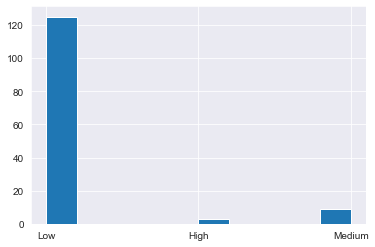

In [24]:
sns.set_style("darkgrid")
train_df["Revenue_binned"].hist()
#plt.savefig("revenuebinned")
#plt.show()

In [25]:
# Starting with time series analysis
df = train_df[["Open Date", "revenue"]]

In [26]:
df["Month"] = df["Open Date"].dt.month
df["Years"] = df["Open Date"].dt.year

In [27]:
df.head()

,Open Date,revenue,Month,Years
0,1999-07-17,5653753.0,7,1999
1,2008-02-14,6923131.0,2,2008
2,2013-03-09,2055379.0,3,2013
3,2012-02-02,2675511.0,2,2012
4,2009-05-09,4316715.0,5,2009


In [28]:
# converting int month to month name
df["Month"] = pd.to_datetime(df["Month"], format = '%m').dt.month_name().str.slice(stop = 3)


In [29]:
df.head()

,Open Date,revenue,Month,Years
0,1999-07-17,5653753.0,Jul,1999
1,2008-02-14,6923131.0,Feb,2008
2,2013-03-09,2055379.0,Mar,2013
3,2012-02-02,2675511.0,Feb,2012
4,2009-05-09,4316715.0,May,2009


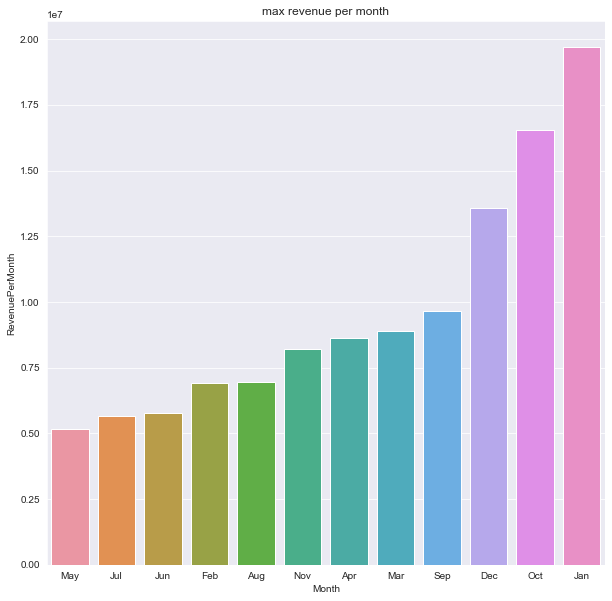

In [30]:
# ploting max revenue per month
plt.figure(figsize = (10, 10))
data = df.groupby("Month").agg(RevenuePerMonth = ("revenue", "max"))
data = data.reset_index().sort_values("RevenuePerMonth")
splot = sns.barplot(data = data, x = "Month", y = "RevenuePerMonth")
plt.title("max revenue per month")
#plt.savefig("max revenue per month.png")
plt.show()

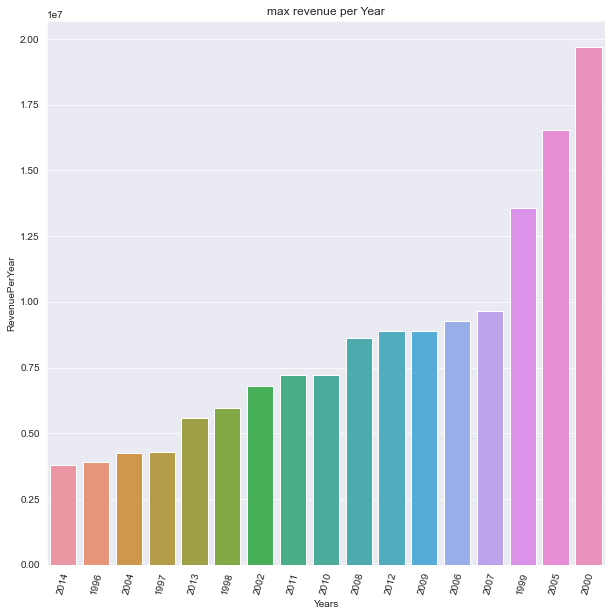

In [31]:
# ploting maximum revenue per year
plt.figure(figsize = (10, 10))
data = df.groupby("Years").agg(RevenuePerYear = ("revenue", "max"))
data = data.reset_index().sort_values("RevenuePerYear")
splot = sns.barplot(data = data, x = "Years", y = "RevenuePerYear", order = data["Years"])
plt.xticks(rotation = 75)
plt.title("max revenue per Year")
#plt.savefig("max revenue per year.png")
plt.show()

In [32]:
train_df.reset_index(inplace = True)



In [33]:
train_df.head()

,index,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Revenue_binned
0,0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,Low
1,1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,Low
2,2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,Low
3,3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,Low
4,4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,Low


In [34]:
train_df.drop("Id", axis = 1, inplace = True)

In [35]:
train_df = train_df.rename(columns = {'level_0': "Id"})

In [36]:
train_df.index

RangeIndex(start=0, stop=137, step=1)

In [37]:
# converting open date to numerical
import datetime as dt
train_df["Open Date"] = train_df["Open Date"].map(dt.datetime.toordinal)

In [38]:
train_df['Open Date'].head()

0    729952
1    733086
2    734936
3    734535
4    733536
Name: Open Date, dtype: int64

In [39]:
train_df.head()

,index,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Revenue_binned
0,0,729952,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,Low
1,1,733086,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,Low
2,2,734936,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,Low
3,3,734535,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,Low
4,4,733536,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,Low


In [40]:
type(cat_variables)

list

In [41]:
# Creating dummis for categorical varibles
for i in cat_variables:
    train_df[i] = pd.get_dummies(train_df[i])

In [42]:
train_df[cat_variables]

,City,City Group,Type
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,0
9,0,0,0


In [43]:
train_df.drop("Revenue_binned", axis = 1, inplace = True)

## Creating models

### Multiple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression


In [45]:
lm = LinearRegression()
lm

LinearRegression()

In [46]:
X = train_df.iloc[:, :-1]

In [47]:
X.head()

,index,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,729952,0,1,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,1,733086,0,1,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,2,734936,0,0,0,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,3,734535,0,0,0,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,4,733536,0,0,0,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3


In [49]:
#drop id 
X.drop("index", axis = 1, inplace= True)

In [50]:
y = train_df.iloc[:, -1]

In [51]:
y

0       5653753.0
1       6923131.0
2       2055379.0
3       2675511.0
4       4316715.0
5       5017319.0
6       5166635.0
7       4491607.0
8       4952497.0
9       5444227.0
10      3745135.0
11      5161370.0
12      1734634.0
13      4807746.0
14      1999097.0
15      3218918.0
16     19696939.0
17      8213524.0
18      5337526.0
19      2021934.0
20      5525735.0
21      1149870.0
22      3956086.0
23      2999068.0
24      8904084.0
25      3778621.0
26      2267425.0
27      5435276.0
28      4705945.0
29      3447890.0
30      3008199.0
31      2058644.0
32      3261924.0
33      2371202.0
34      4100886.0
35      3903884.0
36      3028267.0
37      2740687.0
38      5461700.0
39      3818055.0
40      6836483.0
41      4554237.0
42      4952255.0
43      2732645.0
44      4264176.0
45      3752885.0
46      4250758.0
47      7865428.0
48      7201784.0
49      8630682.0
50      2156098.0
51      3273041.0
52      1763231.0
53      5595267.0
54      4651866.0
55      69

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [54]:
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
y_hat = lm.predict(X_test)

In [56]:
comparison = pd.DataFrame(data = {"Actual": y_test, "Predicted": y_hat})

In [57]:
comparison["Predicted"] = comparison["Predicted"].astype("int")

In [58]:
comparison.head()

,Actual,Predicted
26,2267425.0,8309663
8,4952497.0,8037974
86,3351383.0,1976844
78,3871344.0,-7299029
43,2732645.0,2815894


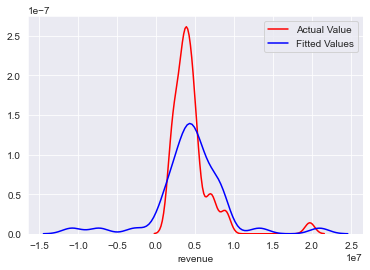

In [59]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [60]:
from sklearn.metrics import mean_squared_error
print("Mse is : ", mean_squared_error(y_test, y_hat))

Mse is :  26154911780468.676


In [61]:
lm.score(X_test, y_test)

-2.2673872899026737

In [62]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F48C-6A56

 Directory of C:\Users\MUHLIS\Desktop\66daysofdata\Python\20210622  - Restaurant Price prediction

07/05/2021  02:51 PM    <DIR>          .
07/05/2021  02:51 PM    <DIR>          ..
06/24/2021  05:54 PM    <DIR>          .ipynb_checkpoints
06/24/2021  05:54 PM    <DIR>          1.Original Data
06/24/2021  05:54 PM    <DIR>          2.Prepared Data
06/30/2021  08:48 PM    <DIR>          day 7
07/03/2021  04:52 PM    <DIR>          day 7 8 9
06/24/2021  09:26 PM    <DIR>          day2
06/28/2021  12:06 AM    <DIR>          day3
06/28/2021  12:08 AM    <DIR>          day4
06/30/2021  08:45 PM    <DIR>          day5 and 6
07/05/2021  02:51 PM           200,278 Restaurant Price prediction.ipynb
               1 File(s)        200,278 bytes
              11 Dir(s)  48,255,520,768 bytes free


In [63]:
test_df = pd.read_csv("2.Prepared Data\\test.csv")

In [64]:
test_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [65]:
test_data = test_df.drop("Id", axis = 1)

In [66]:
for i in cat_variables:
    test_data[i] = pd.get_dummies(test_data[i])

In [67]:
test_data["Open Date"].dtype

dtype('O')

In [68]:
test_data["Open Date"] = test_data["Open Date"].astype("datetime64")

In [69]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,2011-01-22,0,0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,2011-03-18,0,0,0,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2013-10-30,0,1,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,2013-05-06,0,0,0,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,2013-07-31,0,0,0,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [70]:
test_data["Open Date"] = test_data["Open Date"].map(dt.datetime.toordinal)

In [71]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,734159,0,0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,734214,0,0,0,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,735171,0,1,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,734994,0,0,0,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,735080,0,0,0,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [72]:
y_hat_test = lm.predict(test_data)

In [73]:
y_hat_test

array([-1453058.45550776,  4406006.11637157,  4296642.91968226, ...,
        7057017.01822907, 10042273.42053962, 14464261.84811068])

In [74]:
test_data["Predicted"] = y_hat_test

In [75]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Predicted
0,734159,0,0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,-1.453058e+06
1,734214,0,0,0,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,4.406006e+06
2,735171,0,1,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4.296643e+06
3,734994,0,0,0,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,5.694184e+06
4,735080,0,0,0,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,7.104568e+06


In [76]:
test_data["Predicted"] = test_data["Predicted"].astype("int")

In [77]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Predicted
0,734159,0,0,0,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,-1453058
1,734214,0,0,0,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,4406006
2,735171,0,1,0,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,4296642
3,734994,0,0,0,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0,5694184
4,735080,0,0,0,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0,7104567


<BarContainer object of 137 artists>

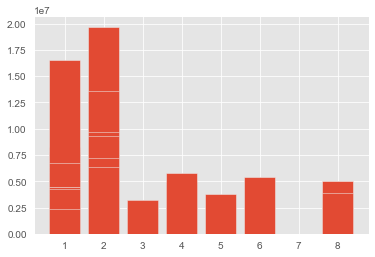

In [79]:
plt.style.use('ggplot')
plt.bar(train_df["P5"], height = train_df["revenue"])

In [82]:
for i in ord_variables:
    print(train_df[i].unique())

[ 4  2  6  3  1  9 12  5]
[5.  4.  4.5 6.  3.  1.  2.  7.5]
[4.  2.  6.  3.  4.5 5.  7.5 0. ]
[4.  5.  6.  7.5 3.  4.5]
[2 1 4 8 6 3 5]
[ 2  3  4 10  5  1  6  8]
[ 5 10  1  4  3  2]
[ 4  5  8 10  3  1  2  6]
[ 5 10  8  4]
[ 5 10  8  4]
[ 3  1  2  8 10  4  5  6]
[ 5 10  8  3  4  2  6]
[5.  7.5 6.  4.  3. ]
[ 1  0  6  2  3  4 15  9 12  5]
[ 2  0  4  1 10  5  3  8]
[ 2  0  9  4  5 15  3 12  1]
[ 2  0  3  1  4  5 15  9  6]
[ 4  0 12  3  1  9  5]
[ 5  3  1 20  2 25 10  4 15]
[ 4  2  1 12  6  5  3 15  9]
[ 1  6  3  2 15  5  4  9]
[3 1 2 4 5]
[ 3  2  1 10  5 20 25  4 15]
[ 1  0  2  5  4  8  3 10  6]
[ 1  0  2  3  4  8  5 10]
[ 1.   0.   2.5  3.   4.  10.   2.   5.  12.5  7.5]
[ 4.   0.   2.5  5.   2.   3.   1.  10.  12.5]
[ 2.   3.   1.   2.5  7.5  5.  10.   4.  12.5]
[3.  7.5 5.  2.  2.5 1.  0. ]
[ 5  0 25  4  3 10  1 20 15]
[ 3  0 12  1  5 15  2  6  9  4]
[ 4  0 10  3  2  5 20 25 15  1]
[5 0 6 2 3 4]
[ 5  0 18  3  4 12  2 24]
[ 4  0 12  5  3  2  1 15]
[ 3  0 12  4 16  5 20  2]
[4 0 6 3 5 2 